In [16]:
import pandas as pd
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import kaleido


ModuleNotFoundError: No module named 'kaleido'

In [2]:
data = pd.read_pickle('AgesAndHeights.pkl')
data.head()

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414


<AxesSubplot:>

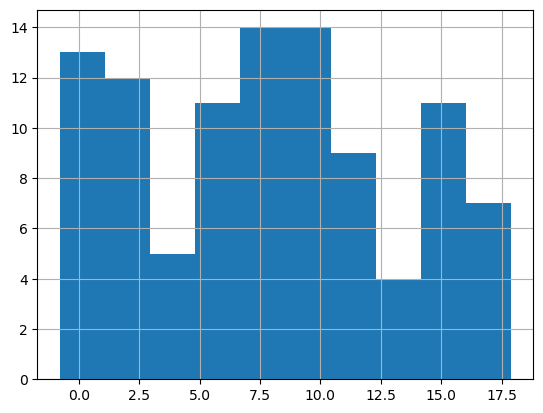

In [3]:
ages = data['Age']
heights = data['Height']
ages.hist()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>]], dtype=object)

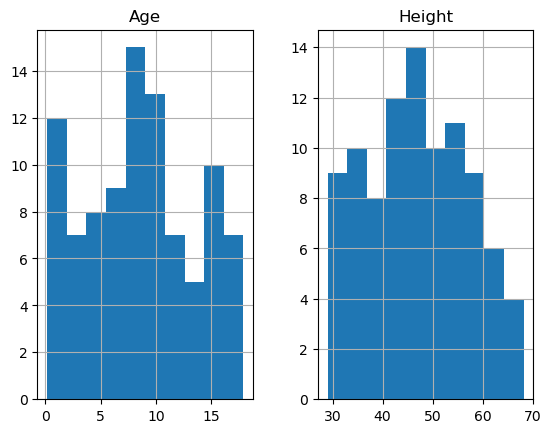

In [4]:
data = data[ages > 0]
ages = data['Age']
heights = data['Height']
data.hist()

<AxesSubplot:xlabel='Age', ylabel='Height'>

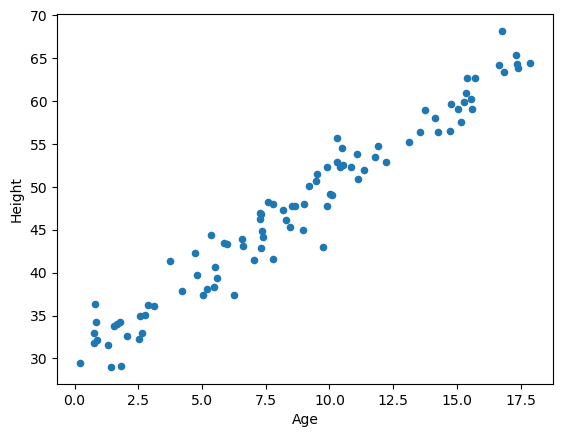

In [5]:
data.plot.scatter(x='Age', y='Height')

In [6]:
fig = px.scatter(x=ages, y=heights, title='Height vs Age of People', labels={'x':'Age (years)', 'y':'Height (inches)'})
fig.show()

In [7]:
ages_np = ages.to_numpy()
heights_np = heights.to_numpy()


In [8]:
ages_np_reshaped = ages_np.reshape(len(ages), 1)

In [9]:
model = LinearRegression().fit(ages_np_reshaped, heights_np)
model.coef_

array([2.0014169])

In [10]:
x_new = np.array(list(range(19))).reshape(19,1)
y_pred = model.predict(x_new)

fig = px.scatter(x=ages, y=heights, title='Height vs Age of People', labels={'x':'Age (years)', 'y':'Height (inches)'})
fig.add_trace(go.Scatter(x=x_new.reshape(19), y=y_pred, mode='lines', name='Model'))
fig.show()

In [11]:
from joblib import dump, load

In [12]:
dump(model, 'model.joblib')

['model.joblib']

In [13]:
model_in = load('model.joblib')
model_in.predict(np.array([[1]]))

array([31.96327451])

In [14]:
def make_picture(training_data_filename, model, new_inp_np_arr, output_file):
    data = pd.read_pickle(training_data_filename)
    ages = data['Age']
    heights = data['Height']
    data = data[ages > 0]
    ages = data['Age']
    heights = data['Height']
    x_new = np.array(list(range(19))).reshape(19,1)
    y_pred = model.predict(x_new)

    fig = px.scatter(x=ages, y=heights, title='Height vs Age of People', labels={'x':'Age (years)', 'y':'Height (inches)'})
    fig.add_trace(go.Scatter(x=x_new.reshape(19), y=y_pred, mode='lines', name='Model'))

    new_preds = model.predict(new_inp_np_arr)

    fig.add_trace(go.Scatter(x=new_inp_np_arr.reshape(len(new_inp_np_arr)), y=new_preds, name='New Outputs', mode='markers', marker=dict(color='purple', size=20, line=dict(color='purple', width=5))))
    
    fig.write_image(output_file, width=800)
    fig.show()

In [17]:
make_picture('AgesAndHeights.pkl', model_in, np.array([[1], [17]]), 'x.svg')

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
